In [1]:
import matplotlib.pyplot as plt
import numpy as np

from common import NGSpiceRaw

%matplotlib widget

In [2]:
data = NGSpiceRaw("simulation/tgate_tb.raw", live=True)
print("Fields:", data.names)

Loaded 1 plots from simulation/tgate_tb.raw
Fields: ('time', 'v(vdd)', 'v(vss)', 'v(x1.ctrl_ni)', 'v(ctrl)', 'v(out_p)', 'v(x1.ctrl_i)', 'v(in_p)', 'v(x1.x2.net1)', 'v(x2.ctrl_ni)', 'v(out_n)', 'v(x2.ctrl_i)', 'v(in_n)', 'v(x2.x2.net1)', 'i(vctrl)', 'i(vinn)', 'i(vinp)', 'i(vss)', 'i(vdd)', 'v(n.x2.xm4.nsg13_lv_pmos#NOI)', 'v(n.x2.xm4.nsg13_lv_pmos#GP)', 'v(n.x2.xm4.nsg13_lv_pmos#SI)', 'v(n.x2.xm4.nsg13_lv_pmos#DI)', 'v(n.x2.xm4.nsg13_lv_pmos#BP)', 'v(n.x2.xm4.nsg13_lv_pmos#BI)', 'v(n.x2.xm4.nsg13_lv_pmos#BS)', 'v(n.x2.xm4.nsg13_lv_pmos#BD)', 'v(n.x2.xm4.nsg13_lv_pmos#INT1)', 'v(n.x2.xm4.nsg13_lv_pmos#INT2)', 'v(n.x2.xm4.nsg13_lv_pmos#INT3)', 'v(n.x2.xm4.nsg13_lv_pmos#INT4)', 'v(n.x2.xm4.nsg13_lv_pmos#INT5)', 'v(n.x2.xm4.nsg13_lv_pmos#INT6)', 'v(n.x2.xm4.nsg13_lv_pmos#INT7)', 'v(n.x2.xm4.nsg13_lv_pmos#INT8)', 'v(n.x2.xm4.nsg13_lv_pmos#INT9)', 'v(n.x2.xm4.nsg13_lv_pmos#flow(RES1))', 'v(n.x2.xm4.nsg13_lv_pmos#flow(SPLINE1))', 'v(n.x2.xm4.nsg13_lv_pmos#flow(RES2))', 'v(n.x2.xm4.nsg13_lv_p

In [3]:
F_SAMPLING = 80e6
N = 128
BASE_HARMONIC = 3
F_SIGNAL = F_SAMPLING / N * BASE_HARMONIC

In [4]:
times = data['time']
vin_n = data['v(in_n)']
vin_p = data['v(in_p)']
vout_n = data['v(out_n)']
vout_p = data['v(out_p)']

Loaded 1 plots from simulation/tgate_tb.raw
Loaded 1 plots from simulation/tgate_tb.raw
Loaded 1 plots from simulation/tgate_tb.raw
Loaded 1 plots from simulation/tgate_tb.raw
Loaded 1 plots from simulation/tgate_tb.raw


In [5]:
vin = vin_p - vin_n
vout = vout_p - vout_n

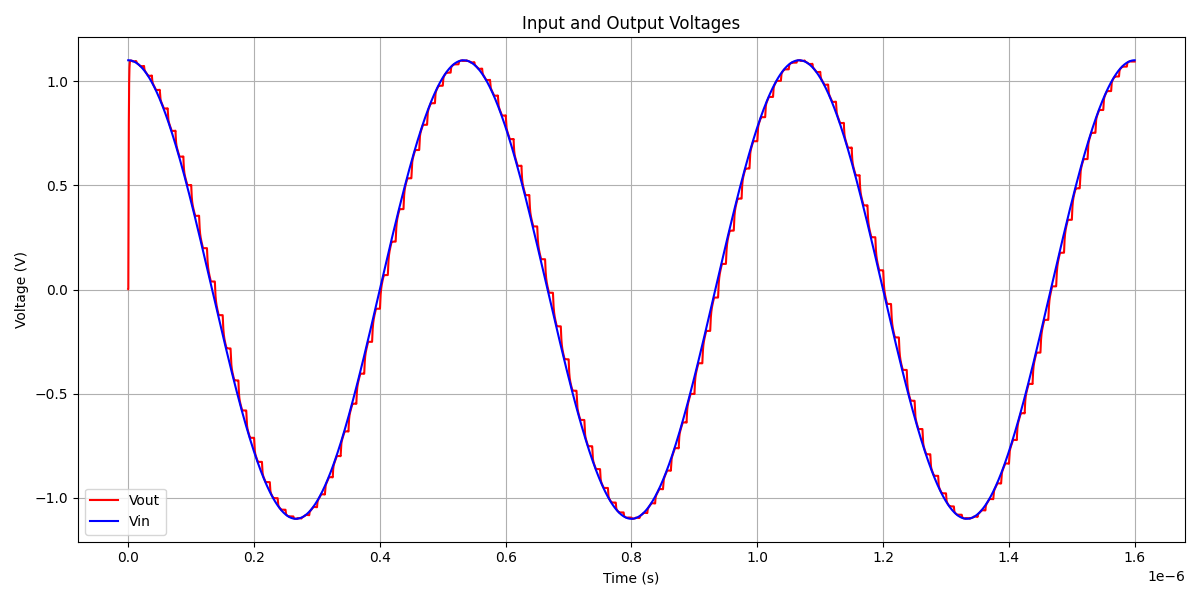

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(times, vout, label='Vout', color='red')
plt.plot(times, vin, label='Vin', color='blue')
plt.title('Input and Output Voltages')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
2.24e-15 * 2**2 / 1e-15
# LSB cap : 10fF
10e-15 * 2**8 / 1e-12
# Total output cap: 2.7pF

2.56

In [18]:
8e-12 * 1.1

8.800000000000001e-12

In [22]:
(8e-12 * 1.1) / 10e-9

0.0008800000000000001

Number of samples: 128
Frequency bin size: 625000.0
Sampling error (p-p): 23.8 mV


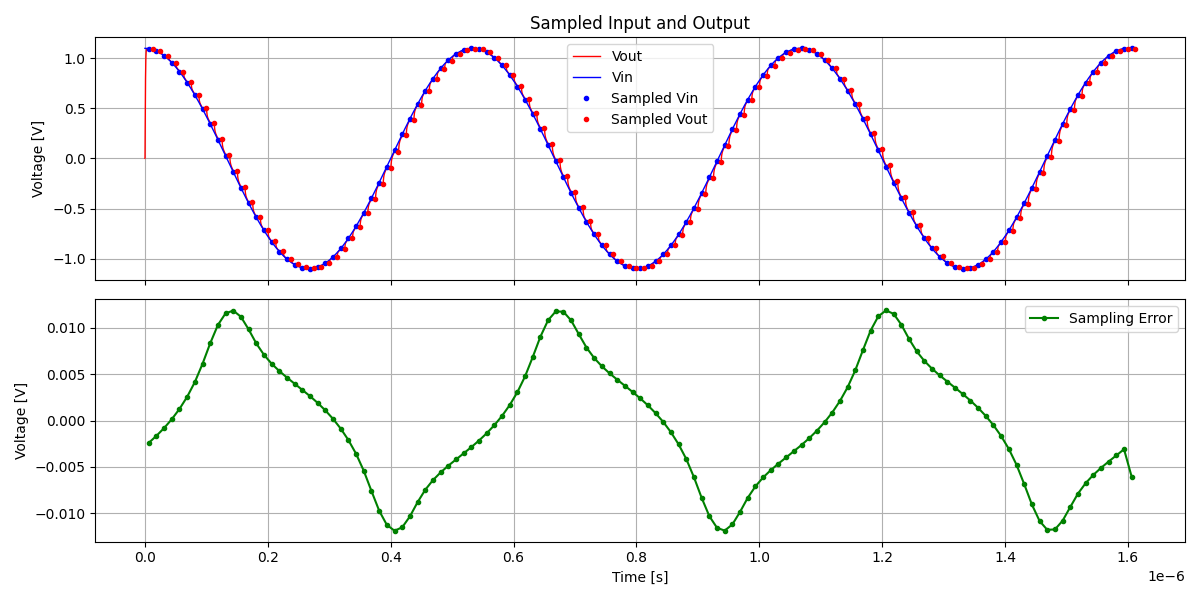

In [8]:
sampling_times_in = [0.5 / F_SAMPLING]
while sampling_times_in[-1] < times[-1]:
    sampling_times_in.append(sampling_times_in[-1] + 1 / F_SAMPLING)

sampling_times_out = [0.99 / F_SAMPLING]
while sampling_times_out[-1] < times[-1]:
    sampling_times_out.append(sampling_times_out[-1] + 1 / F_SAMPLING)

sampling_times_in = np.array(sampling_times_in)
sampling_times_out = np.array(sampling_times_out)
sampling_vin = np.interp(sampling_times_in, times, vin)
sampling_vout = np.interp(sampling_times_out, times, vout)
sampling_times_in = sampling_times_in
sampling_times_out = sampling_times_out
sampling_error = sampling_vout - sampling_vin

# assert N == len(sampling_times_in)
f_bin = F_SAMPLING / N
print("Number of samples:", N)
print("Frequency bin size:", f_bin)
print(f"Sampling error (p-p): {(np.max(sampling_error) - np.min(sampling_error))*1e3:.1f} mV")

fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
ax[0].plot(times, vout, label='Vout', color='red', linewidth=1)
ax[0].plot(times, vin, label='Vin', color='blue', linewidth=1)
ax[0].plot(sampling_times_in, sampling_vin, label='Sampled Vin', color='blue', marker='o', markersize=3, linestyle='None')
ax[0].plot(sampling_times_out, sampling_vout, label='Sampled Vout', color='red', marker='o', markersize=3, linestyle='None')
ax[0].set_title('Sampled Input and Output')
ax[0].set_ylabel('Voltage [V]')
ax[0].grid()
ax[0].legend()
ax[1].plot(sampling_times_in, sampling_error, label='Sampling Error', color='green', marker='o', markersize=3)
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Voltage [V]')
ax[1].grid()
ax[1].legend()
plt.tight_layout()
plt.show()

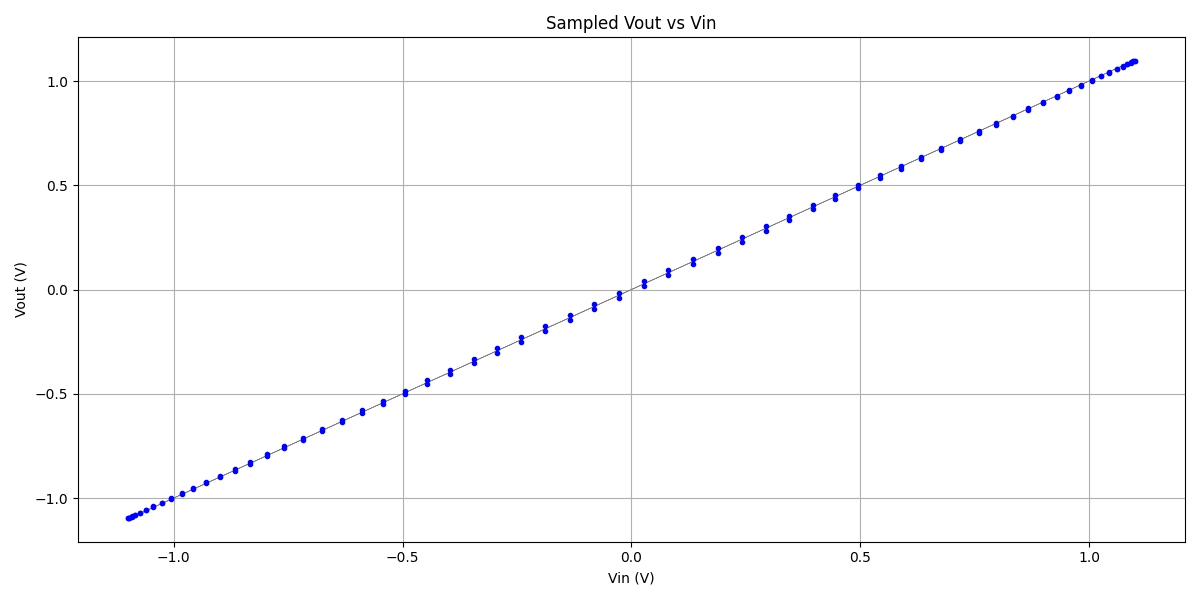

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(sampling_vin[:-1], sampling_vin[:-1], color='gray', linewidth=0.5)
plt.plot(sampling_vin[:-1], sampling_vout[:-1], marker='o', markersize=3, linestyle='None', color='blue')
plt.title('Sampled Vout vs Vin')
plt.xlabel('Vin (V)')
plt.ylabel('Vout (V)')
plt.grid()
plt.tight_layout()
plt.show()

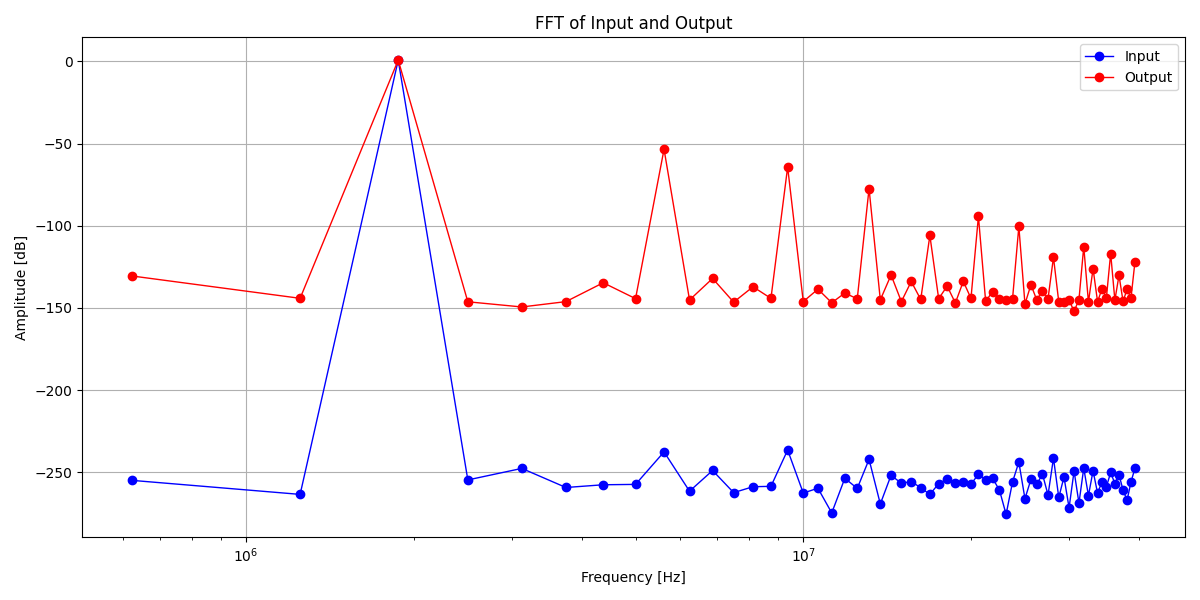

In [10]:
# FFT of input and output signals
N = len(sampling_vin[:-1])
T = 1 / F_SAMPLING

yf_vin = np.fft.fft(sampling_vin[:-1])
yf_vout = np.fft.fft(sampling_vout[:-1])
xf = np.fft.fftfreq(N, T)

yf_vin = 2.0 / N * np.abs(yf_vin[xf > 0])
yf_vout = 2.0 / N * np.abs(yf_vout[xf > 0])
xf = xf[xf > 0]

plt.figure(figsize=(12, 6))
plt.plot(xf, 20 * np.log10(yf_vin), 'o-', label='Input', color='blue', linewidth=1)
plt.plot(xf, 20 * np.log10(yf_vout), 'o-', label='Output', color='red', linewidth=1)
# plt.plot(xf, 20 * np.log10(yf_vout) - 20 * np.log10(yf_vin), 'o-', label='Error', color='green', linewidth=1)
plt.title('FFT of Input and Output')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
# plt.xlim(0, 1.5 * F_SIGNAL)
plt.xscale('log')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Caclculate SDR
# -> Power of the harmonics
# 60dB is 10 bit -> 54dB is 9 bit

In [11]:
def compute_thd(signal, fundamental_index, max_harmonics=10):
    """
    Compute THD considering only actual harmonics (2f, 3f, 4f, etc.)
    """
    N = len(signal[:-1])
    yf = np.fft.fft(signal[:-1])
    
    # Fundamental amplitude
    fundamental_amplitude = np.abs(yf[fundamental_index])
    
    # Sum only the actual harmonics up to max_harmonics
    harmonics_amplitude = 0
    for h in range(2, max_harmonics + 1):
        harmonic_index = h * fundamental_index
        if harmonic_index < N // 2:  # Stay within Nyquist limit
            harmonics_amplitude += np.abs(yf[harmonic_index])
    
    thd = harmonics_amplitude / fundamental_amplitude
    return thd

def compute_snr(signal, fundamental_index, max_harmonics=10):
    """
    Compute SNR where noise excludes fundamental (and harmonics)
    """
    N = len(signal[:-1])
    yf = np.fft.fft(signal[:-1])
    
    # Signal power (fundamental only)
    signal_power = np.abs(yf[fundamental_index]) ** 2
    
    # Total power
    total_power = np.sum(np.abs(yf[:N//2]) ** 2)  # Only positive frequencies
    
    # Subtract fundamental and harmonics from total power to get noise
    harmonic_power = signal_power  # Start with fundamental
    # for h in range(2, max_harmonics + 1):
    #     harmonic_index = h * fundamental_index
    #     if harmonic_index < N // 2:
    #         harmonic_power += np.abs(yf[harmonic_index]) ** 2
    
    noise_power = total_power - harmonic_power
    
    if noise_power <= 0:
        return float('inf')  # Perfect signal
    
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

thd_vin = compute_thd(sampling_vin, BASE_HARMONIC)
thd_vout = compute_thd(sampling_vout, BASE_HARMONIC)

snr_vin = compute_snr(sampling_vin, BASE_HARMONIC)
snr_vout = compute_snr(sampling_vout, BASE_HARMONIC)

print("\tTHD\tSNR")
print(f"Vin:\t{thd_vin:.2%}\t{snr_vin:.1f} dB")
print(f"Vout:\t{thd_vout:.2%}\t{snr_vout:.1f} dB")

	THD	SNR
Vin:	0.00%	inf dB
Vout:	0.26%	53.9 dB
